<h1 style="text-align: center;" markdown="1">ECON 320 Lab Final Project Proposal</h1>
<h2 style="text-align: center;" markdown="1">Authors: Isabella Aguado, Hilary Klein, Jihan Lee, Audrey Margolies</h2>

# Introduction and Motivation

The topic of homeownership holds immense significance in the context of the United States, reflecting not only economic stability but also broader societal patterns. In recent years, the dynamics of homeownership have evolved, influenced by  demographic, economic, and social factors have changed. This project investigates the determinants of homeownership rates within the United States. According to Illinois Wesleyan University, the impact of home-ownership determinants has fluctuated with the economy: “Marital status remains important to the homeownership decision, though its effect has weakened. The impact of the level of education is now just as important as the presence of children in a household” (IWU,1999). According to Brookings analyst Jenny Schuetz, discrimination in housing has contributed to substantial wealth gaps between Black and white households. Black and Latino or Hispanic families are less likely to own their homes than white families with similar incomes.

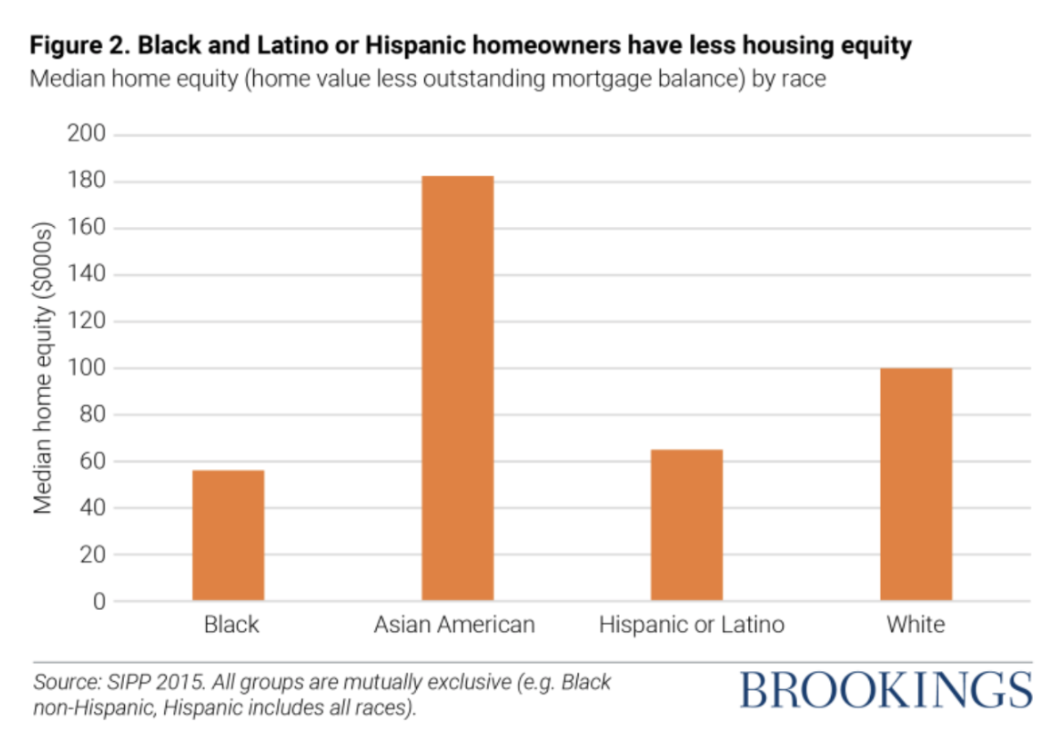

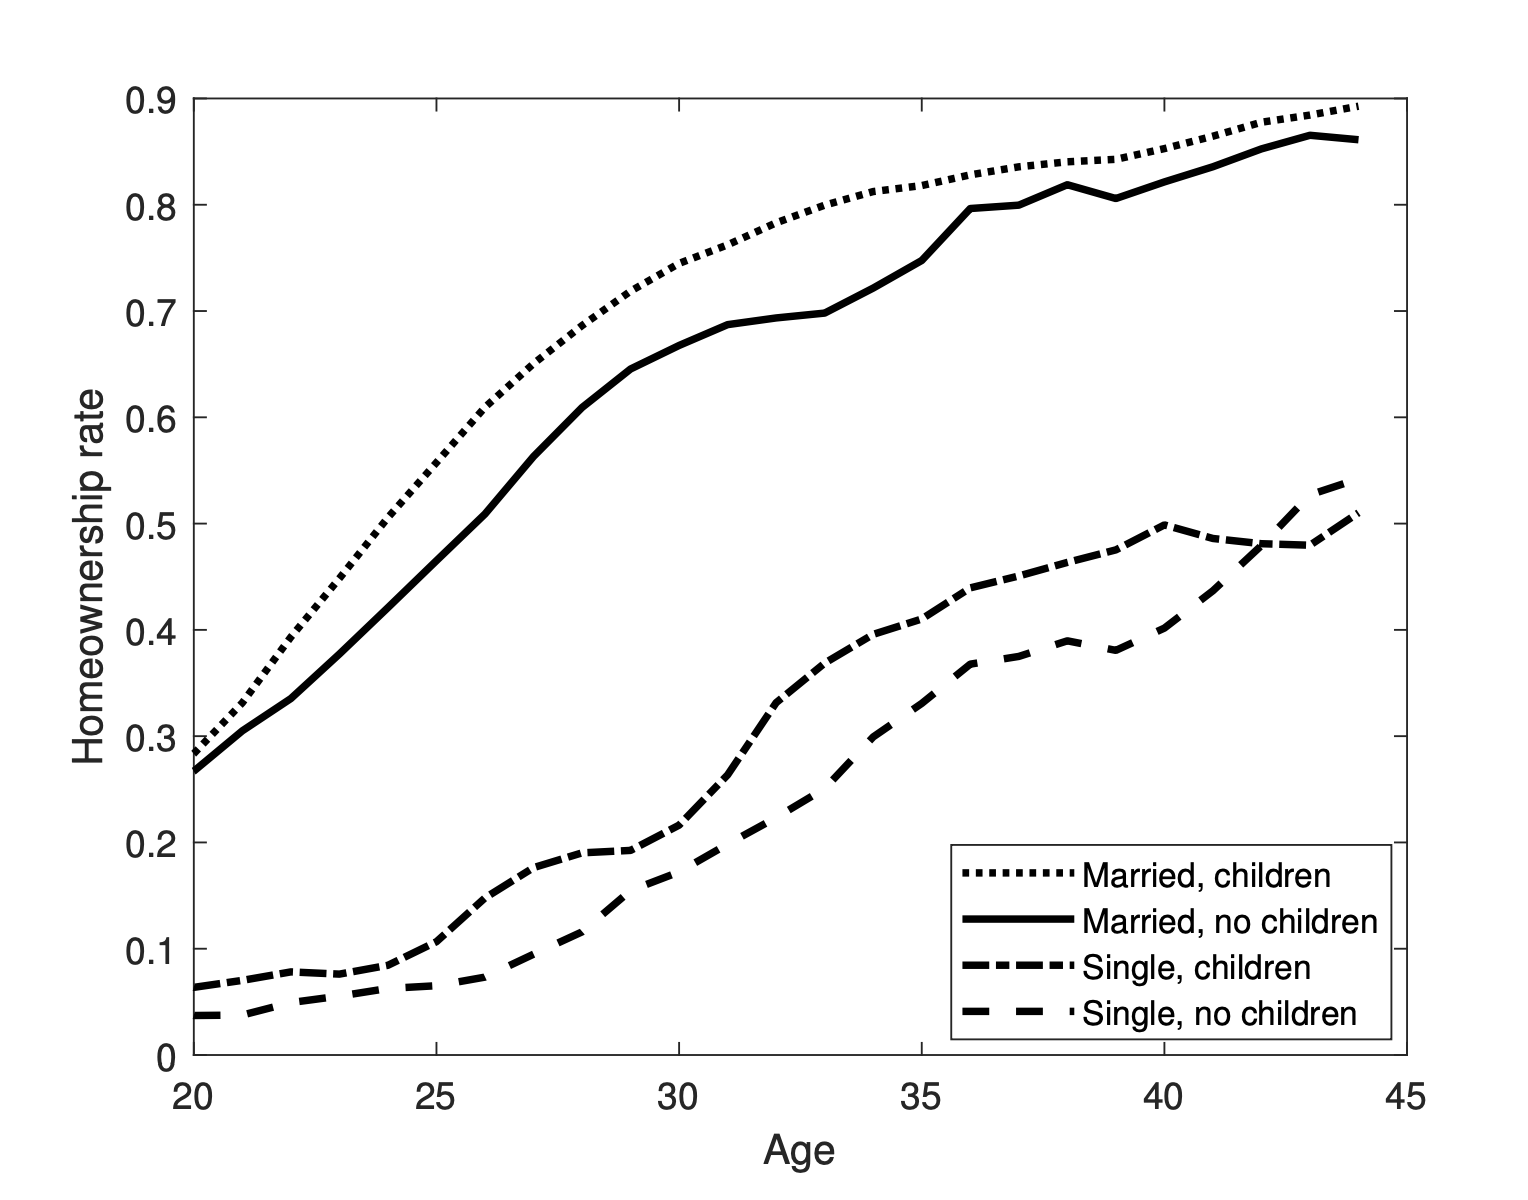

By exploring a dataset from IPUMS containing cross-sectional data after 2013, we aim to uncover insights into the complex interplay of variables such as sex, race/ethnicity, employment status, education level, citizenship, marital status, income, family size, disability, and veteran status. This research strives to contribute to understanding homeownership disparities and the changing landscape of housing in the United States.

# Data and Descriptive Statistics

In [10]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

# Import data
df = pd.read_csv("/Users/jihan/Desktop/Fall 2023/ECON 320 Lab/cps.csv")
df.info()
df.describe().round(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1807034 entries, 0 to 1807033
Data columns (total 12 columns):
 #   Column    Dtype
---  ------    -----
 0   YEAR      int64
 1   OWNERSHP  int64
 2   SEX       int64
 3   RACE      int64
 4   MARST     int64
 5   VETSTAT   int64
 6   FAMSIZE   int64
 7   CITIZEN   int64
 8   EMPSTAT   int64
 9   EDUC      int64
 10  DIFFANY   int64
 11  INCTOT    int64
dtypes: int64(12)
memory usage: 165.4 MB


,YEAR,OWNERSHP,SEX,RACE,MARST,VETSTAT,FAMSIZE,CITIZEN,EMPSTAT,EDUC,DIFFANY,INCTOT
count,1807034.00,1807034.00,1807034.00,1807034.00,1807034.00,1807034.00,1807034.00,1807034.00,1807034.00,1807034.00,1807034.00,1.807034e+06
mean,2017.24,13.83,1.51,170.39,3.74,0.80,3.40,1.49,15.25,65.52,0.86,2.204211e+08
std,2.85,5.58,0.50,173.86,2.33,0.52,1.72,1.22,13.22,41.09,0.54,4.144917e+08
min,2013.00,10.00,1.00,100.00,1.00,0.00,1.00,1.00,0.00,1.00,0.00,-1.645800e+04
25%,2015.00,10.00,1.00,100.00,1.00,0.00,2.00,1.00,10.00,30.00,1.00,1.264200e+04
50%,2017.00,10.00,2.00,100.00,5.00,1.00,3.00,1.00,10.00,73.00,1.00,4.000000e+04
75%,2020.00,22.00,2.00,100.00,6.00,1.00,4.00,1.00,34.00,92.00,1.00,1.490000e+05
max,2022.00,22.00,2.00,830.00,6.00,2.00,16.00,5.00,36.00,125.00,2.00,1.000000e+09


| Variable | Labels                             |
|----------|------------------------------------|
| YEAR     | Survey years                       |
| OWNERSHP | Ownership of dwelling              |
| SEX      | Sex                                |
| RACE     | Race                               |
| MARST    | Marital status                     |
| VETSTAT  | Veteran status                     |
| FAMSIZE  | Number of own family members in hh |
| CITIZEN  | Citizenship status                 |
| EMPSTAT  | Employment status                  |
| EDUC     | Educational attainment recode      |
| DIFFANY  | Any difficulty                     |
| INCTOT   | Total personal income              |

# Regression Model and Results

$$ownershp=\beta_0 + \beta_1*sex + \beta_2*race + \beta_3*marst + \beta_4*vetstat + \beta_5*famsize + \beta_6*citizen + \beta_7*empstat + \beta_8*educ + \beta_9*diffany + \beta_3*inctot + u$$

In [11]:
smf.ols(formula="OWNERSHP ~ SEX + RACE + MARST + VETSTAT + FAMSIZE + CITIZEN + EMPSTAT + EDUC + DIFFANY + INCTOT", data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               OWNERSHP   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                 1.704e+04
Date:                Thu, 28 Sep 2023   Prob (F-statistic):               0.00
Time:                        20:40:31   Log-Likelihood:            -5.5907e+06
No. Observations:             1807034   AIC:                         1.118e+07
Df Residuals:                 1807023   BIC:                         1.118e+07
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.2927      0.035    378.024      0.000      13.224      13.362
SEX            0.1919      0.008     23.695      0.000       0.176       0.208
RACE           0.0011   2.36e-05     46.674      0.000       0.001       0.001
MARST          0.5517      0.002    258.993      0.000       0.548       0.556
VETSTAT        0.1248      0.014      8.646      0.000       0.096       0.153
FAMSIZE       -0.3347      0.003   -130.272      0.000      -0.340      -0.330
CITIZEN        0.7034      0.003    202.725      0.000       0.697       0.710
EMPSTAT       -0.0408      0.000    -98.022      0.000      -0.042      -0.040
EDUC          -0.0197      0.000   -100.605      0.000      -0.020      -0.019
DIFFANY        0.4005      0.015     26.749      0.000       0.371       0.430
INCTOT     -2.011e-09   2.72e-11    -73.990      0.000   -2.06e-09   -1.96e-09
==============================================================================
Omnibus:                  1339919.077   Durbin-Watson:                   0.714
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           239373.877
Skew:                           0.673   Prob(JB):                         0.00
Kurtosis:                       1.831   Cond. No.                     4.30e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.3e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# References

https://digitalcommons.iwu.edu/cgi/viewcontent.cgi?referer=&httpsredir=1&article=1055&context=econ_honproj#:~:text=The%20factors%20affecting%20home%20ownership,marital%20status%20and%20family%20size.

https://www.brookings.edu/articles/rethinking-homeownership-incentives-to-improve-household-financial-security-and-shrink-the-racial-wealth-gap/

https://www.comlabgames.com/ramiller/working_papers/Main.pdf